In [1]:
import numpy as np
import ROOT
from ROOT.uhi import loc, overflow, rebin, sum, underflow

# Setting and Access

In [2]:
# Creating a 1D histogram
h1 = ROOT.TH1D("h1", "h1", 10, 0, 1)

In [3]:
# Filling with an ArrayLike
h1[...] = np.random.uniform(0, 1, 10) # This does not set the flow bins
h1[...] = np.random.uniform(0, 1, 12) # This sets the flow bins
assert(h1[...] == h1[:])
# h3[...] = h3[:, :, :]

In [4]:
# .values() returns the bin contents as an array
print("h1 bin contents:", h1.values())

h1 bin contents: [0.12519246 0.87735972 0.06767303 0.03640718 0.48516973 0.45042992
 0.11108059 0.82219783 0.73829407 0.37946194]


In [5]:
# Other ways of filling include
# h1[...] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# h1[...] = range(10)
# h1[...] = np.arange(10)
# h1[...] = np.linspace(0, 9, 10)

In [6]:
# Filling with a scalar
h1[...] = 8  # This does not set the flow bins

In [7]:
# Broadcasting
# h1[...] = np.array([2])

In [8]:
# Filling Individual bins
h1[0] = 1  # First valid bin
h1[-1] = 2  # Last valid bin
h1[underflow] = 3  # Underflow bin
h1[overflow] = 4  # Overflow bin
h1[loc(0.5)] = 5  # Using data coordinates
h1[loc(0.5) + 1] = 6  # Using data coordinates, filling the bin above the one containing 0.5

print("h1 bin contents (after setting values):", h1.values())
print("Underflow bin:", h1[underflow], "Overflow bin:", h1[overflow])  # Accessing flow bins

h1 bin contents (after setting values): [1. 8. 8. 8. 8. 5. 6. 8. 8. 2.]
Underflow bin: 3.0 Overflow bin: 4.0


# Slicing

In [9]:
h1[2:5] = [4, 8, 3]  # Setting contents of bins 2 to 4 (inclusive), changes h1 in place
h1[loc(0.7):] = 9  # Leaving out endpoints, setting all bins above 0.7 to 9 (using data coordinates)
print("h1 bin contents (after setting a slice):", h1.values())

h1 bin contents (after setting a slice): [1. 8. 4. 8. 3. 5. 6. 9. 9. 9.]


In [10]:
h1_sliced = h1[2:7]  # Slicing from bin 2 to bin 6 (inclusive), returns a new histogram
print("h1_sliced bin contents:", h1_sliced.values())
print("Underflow bin:", h1_sliced[underflow], "Overflow bin:", h1_sliced[overflow])  # Values outside the slice fall into the flow bins

h1_sliced bin contents: [4. 8. 3. 5. 6.]
Underflow bin: 12.0 Overflow bin: 31.0


In [11]:
# Slicing with actions
h1_rebinned = h1[2:8:rebin(2)]  # Rebinning the x axis of the slice by a factor of 2
print("h1_rebinned bin contents:", h1_rebinned.values())

h1_rebinned bin contents: [12.  8. 15.]


In [12]:
full_integral = h1[::sum]  # Integral of the histogram, includes flow bins
non_flow_integral = h1[0:len:sum]  # Integral of the histogram, excludes flow bins
slice_integral = h1[2:loc(0.6):sum]  # Integral of the slice, excludes flow bins
print("Full integral:", full_integral, "Non-flow integral:", non_flow_integral, "Slice integral:", slice_integral)

Full integral: 69.0 Non-flow integral: 62.0 Slice integral: 20.0


In [13]:
# h3_proj_x = h3[::sum, ...] # Project the x axis along y and z, returns a new 2D histogram
# h3_proj_xy = h3[::sum, :, ::sum] # Project the x and z axes along y, returns a new 1D histogram
# h3_proj_z = h3[..., v] # A single value v is like v:v+1:sum, returns a new 2D histogram

In [14]:
h1_rebinned_dict = h1[{0: slice(None, None, rebin(5))}] # Using dictionary syntax for slicing
h1_rebinned_dict = h1[{0: np.s_[::rebin(5)]}]  # Using numpy's slice utility
print("h1 with dictionary syntax:", h1_rebinned_dict.values())

h1 with dictionary syntax: [24. 38.]


# Plotting

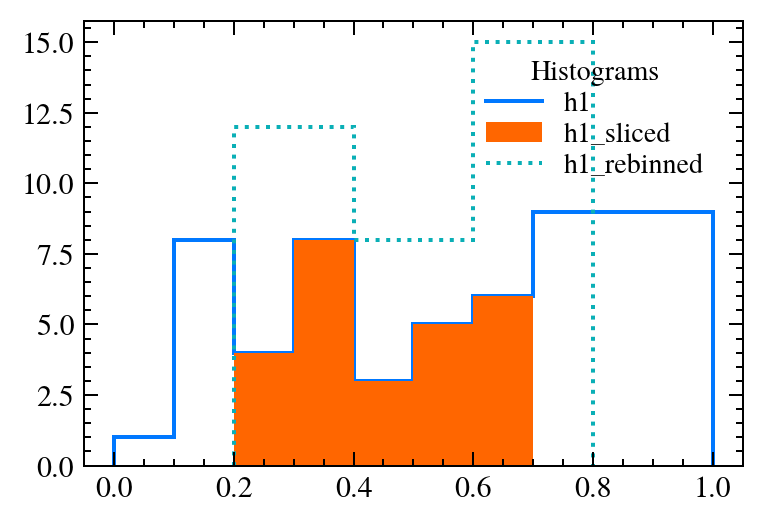

In [15]:
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use("LHCb2")

fig = plt.figure(figsize=(10,7))

hep.histplot(h1, label="h1", yerr=False, linewidth=4)
hep.histplot(h1_sliced, yerr=False, label="h1_sliced", histtype="fill", linewidth=4, linestyle="--")
hep.histplot(h1_rebinned, yerr=False, label="h1_rebinned", linewidth=4, linestyle=":")

plt.legend(title="Histograms")
plt.show()

In [16]:
from histoprint import print_hist

print_hist(h1, title="h1 Histogram")

                                 h1 Histogram                                  
  0.000 _                                                             4.5/row ╷
         ███████
  0.100 _███████
         ██████████████████████████████████████████████████████████████
  0.200 _██████████████████████████████████████████████████████████████
         ███████████████████████████████
  0.300 _███████████████████████████████
         ██████████████████████████████████████████████████████████████
  0.400 _██████████████████████████████████████████████████████████████
         ███████████████████████
  0.500 _███████████████████████
         ██████████████████████████████████████
  0.600 _██████████████████████████████████████
         ██████████████████████████████████████████████
  0.700 _██████████████████████████████████████████████
         ██████████████████████████████████████████████████████████████████████
  0.800 _██████████████████████████████████████████████████████████████████████
  